## Credit EDA Case Study
### By: Sachin Katiyar and Asawari Kadam

In [1]:
#importing library and loading application dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'application_data.csv')
print(df)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cas

### Quality Check, Missing Value Treatment and Analysis

In [2]:
#Printing Total missing values and Percentage of missing values for each column
total_missing= df.isnull().sum()
percent_missing=((df.isnull().sum()/df.isnull().count())*100)
missing_application_data=pd.concat([total_missing,percent_missing],axis=1, keys=['Total Missing','Percent Missing'])
pd.set_option('display.max_rows', None)
print(missing_application_data.sort_values(by='Percent Missing',ascending=False))

                              Total Missing  Percent Missing
COMMONAREA_MEDI                      214865        69.872297
COMMONAREA_AVG                       214865        69.872297
COMMONAREA_MODE                      214865        69.872297
NONLIVINGAPARTMENTS_MODE             213514        69.432963
NONLIVINGAPARTMENTS_AVG              213514        69.432963
NONLIVINGAPARTMENTS_MEDI             213514        69.432963
FONDKAPREMONT_MODE                   210295        68.386172
LIVINGAPARTMENTS_MODE                210199        68.354953
LIVINGAPARTMENTS_AVG                 210199        68.354953
LIVINGAPARTMENTS_MEDI                210199        68.354953
FLOORSMIN_AVG                        208642        67.848630
FLOORSMIN_MODE                       208642        67.848630
FLOORSMIN_MEDI                       208642        67.848630
YEARS_BUILD_MEDI                     204488        66.497784
YEARS_BUILD_MODE                     204488        66.497784
YEARS_BUILD_AVG         

In [3]:
print("Size of application data",df.shape)

#dividing dataset based on target value i.e. df0 will contain data corresponding to Target variable 0 and df1 will contain data corresponding to Target variable 1
df0=df[df['TARGET']==0]
df1=df[df['TARGET']==1]
print("df0 - Size of data having Target variable 0:",df0.shape)
print("df1 - Size of data having Target variable 1:",df1.shape)

#Removing columns having null values greater than 17 percent
df=df[df.columns[df.isnull().mean() <= 0.17]]
df0=df0[df0.columns[df0.isnull().mean() <= 0.17]]
df1=df1[df1.columns[df1.isnull().mean() <= 0.17]]
print("\nSize of application data after removing columns having null values greater than 17 percent:",df.shape)
print("df0 shape after removing columns having null values greater than 17 percent:",df0.shape)
print("df1 shape after removing columns having null values greater than 17 percent:",df1.shape)

Size of application data (307511, 122)
df0 - Size of data having Target variable 0: (282686, 122)
df1 - Size of data having Target variable 1: (24825, 122)

Size of application data after removing columns having null values greater than 17 percent: (307511, 71)
df0 shape after removing columns having null values greater than 17 percent: (282686, 71)
df1 shape after removing columns having null values greater than 17 percent: (24825, 65)


In [4]:
#printing npercentage of null values for columns available in df
print(df.isnull().mean().sort_values(ascending=False))

AMT_REQ_CREDIT_BUREAU_YEAR     0.135016
AMT_REQ_CREDIT_BUREAU_MON      0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     0.135016
AMT_REQ_CREDIT_BUREAU_DAY      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     0.135016
AMT_REQ_CREDIT_BUREAU_QRT      0.135016
NAME_TYPE_SUITE                0.004201
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
CNT_FAM_MEMBERS                0.000007
DAYS_LAST_PHONE_CHANGE         0.000003
FLAG_EMP_PHONE                 0.000000
FLAG_MOBIL                     0.000000
DAYS_REGISTRATION              0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
DAYS_ID_PUBLISH                0.000000
NAME_HOUSING_TYPE              0.000000


In [5]:
#Filling null values with appropriate suitable values

#Since value for person who was accompanying client when he was applying for the loan is blank, we can fill it by unaccompanied that is he is alone during appluing for loan.
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna('Unaccompanied')

#Since value of family members count of client is blank, we can fill it with 1 i.e. he is alone (best possible scenario observed by bank).
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].fillna(1)

#Since price of goods for which loan is given is not mentioned, we can fill it by the credit amount of the loan (best case)
df['AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].fillna(df['AMT_CREDIT'])

#Since data for observation of client's social surroundings defaulted on 60 and 30 (days past due) DPD is not mentioned, we can replace them by 0 as most of the time defaulter will hide from bank. 
df['DEF_60_CNT_SOCIAL_CIRCLE']=df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)
df['DEF_30_CNT_SOCIAL_CIRCLE']=df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)

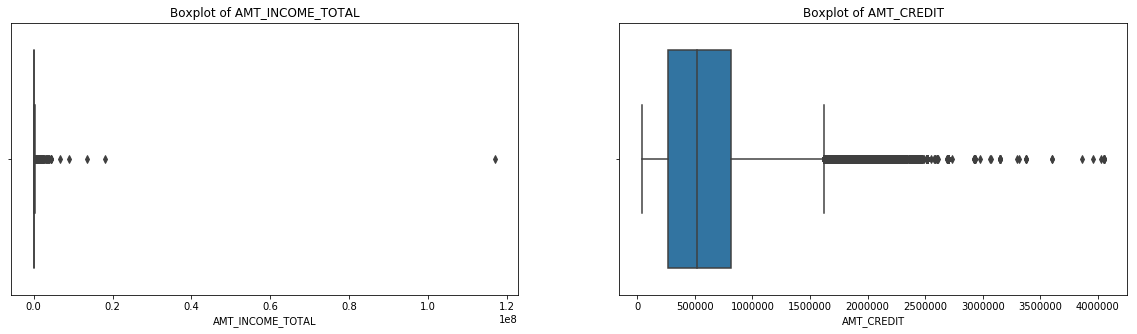

In [6]:
#Detecting columns having outliers
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
plt.figure(figsize=(20,5))
subplot(1,2,1)
plt.title("Boxplot of AMT_INCOME_TOTAL")
ax = sns.boxplot(df["AMT_INCOME_TOTAL"])
subplot(1,2,2)
plt.title("Boxplot of AMT_CREDIT")
sns.boxplot(df0["AMT_CREDIT"])
plt.show()

##### Above box plot shows a lot of outliers in both the columns (AMT_INCOME_TOTAL and AMT_CREDIT), thus proceeding to remove these outliers as they can lead to inappropriate results

In [7]:
#Finding outiers for AMT_INCOME_TOTAL column in df i.e. values above and below 75% and 25% respectively and removing them.
q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
#Interquartile range
intr_qua_rnge = q3-q1 
low  = q1-1.5*intr_qua_rnge
high = q3+1.5*intr_qua_rnge
df_out_inc = df.loc[(df['AMT_INCOME_TOTAL'] > low) & (df['AMT_INCOME_TOTAL'] < high)]
print("Size of column AMT_INCOME_TOTAL in application data file:",df['AMT_INCOME_TOTAL'].size)
print("Size of column AMT_INCOME_TOTAL after removing outliers:",df_out_inc['AMT_INCOME_TOTAL'].size)
print("Number of outliers present in AMT_INCOME_TOTAL column in main file were:",df['AMT_INCOME_TOTAL'].size-df_out_inc['AMT_INCOME_TOTAL'].size)

Size of column AMT_INCOME_TOTAL in application data file: 307511
Size of column AMT_INCOME_TOTAL after removing outliers: 291686
Number of outliers present in AMT_INCOME_TOTAL column in main file were: 15825


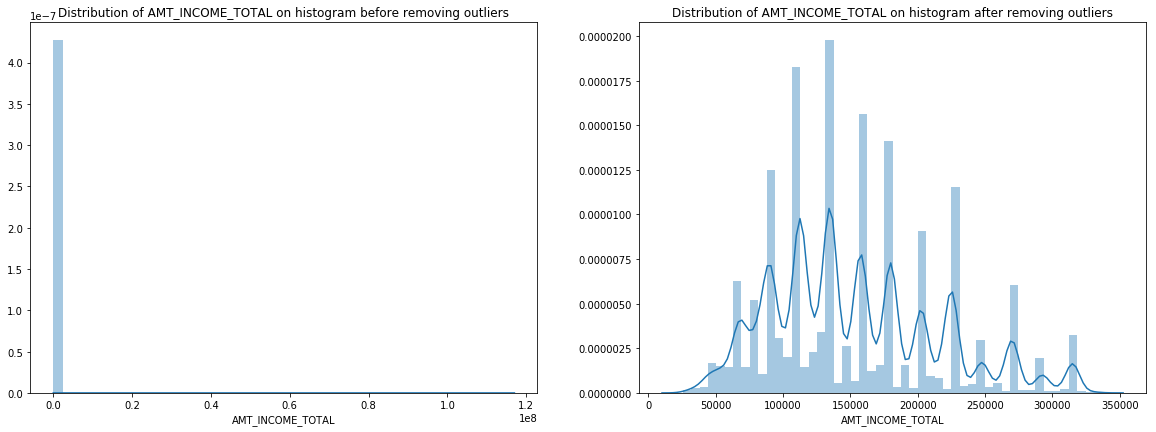

In [8]:
#Plotting histogram for distinguishing between clarity of data before and after removing outliers
from pylab import *
plt.figure(figsize=(20,15))
subplot(2,2,1)
plt.title("Distribution of AMT_INCOME_TOTAL on histogram before removing outliers")
ax = sns.distplot(df["AMT_INCOME_TOTAL"])
subplot(2,2,2)
plt.title("Distribution of AMT_INCOME_TOTAL on histogram after removing outliers")
ax = sns.distplot(df_out_inc["AMT_INCOME_TOTAL"])
plt.show()

In [9]:
#Finding outiers for AMT_CREDIT column in df i.e. values above and below 75% and 25% respectively and removing them.
q1 = df['AMT_CREDIT'].quantile(0.25)
q3 = df['AMT_CREDIT'].quantile(0.75)
#Interquartile range
intr_qua_rnge = q3-q1 
low  = q1-1.5*intr_qua_rnge
high = q3+1.5*intr_qua_rnge
df_out_cred = df.loc[(df['AMT_CREDIT'] > low) & (df['AMT_CREDIT'] < high)]
print("Size of column AMT_CREDIT in application data file:",df['AMT_CREDIT'].size)
print("Size of column AMT_CREDIT after removing outliers:",df_out_cred['AMT_CREDIT'].size)
print("Number of outliers present in AMT_INCOME_TOTAL column in main file were:",df['AMT_CREDIT'].size-df_out_cred['AMT_CREDIT'].size)

Size of column AMT_CREDIT in application data file: 307511
Size of column AMT_CREDIT after removing outliers: 300949
Number of outliers present in AMT_INCOME_TOTAL column in main file were: 6562


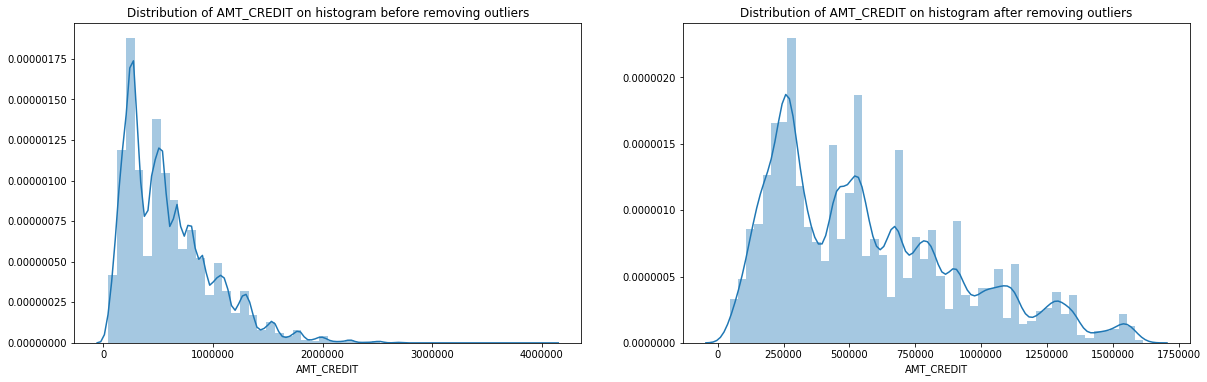

In [10]:
#Plotting histogram for distinguishing between clarity of data before and after removing outliers
from pylab import *
plt.figure(figsize=(20,20))
subplot(3,2,1)
plt.title("Distribution of AMT_CREDIT on histogram before removing outliers")
ax = sns.distplot(df["AMT_CREDIT"])
subplot(3,2,2)
plt.title("Distribution of AMT_CREDIT on histogram after removing outliers")
ax = sns.distplot(df_out_cred["AMT_CREDIT"])
plt.show()

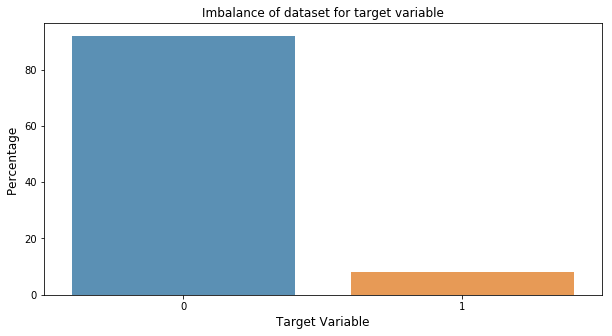

Ratio of Target variable 1 to the Target variable 0 is: 11.387


In [11]:
# As we already have divided dataset based on Target Variable
#df0 will contain data corresponding to Target variable 0 and df1 will contain data corresponding to Target variable 1
#Checking imbalance of data
status = df["TARGET"].value_counts()
y=(status/status.sum())*100
plt.figure(figsize=(10,5))
sns.barplot(status.index, y, alpha=0.8)
plt.title('Imbalance of dataset for target variable')
plt.ylabel('Percentage ', fontsize=12)
plt.xlabel('Target Variable', fontsize=12)
plt.show()
k=df.groupby('TARGET').size()
print("Ratio of Target variable 1 to the Target variable 0 is:",round(k[0]/k[1],3))

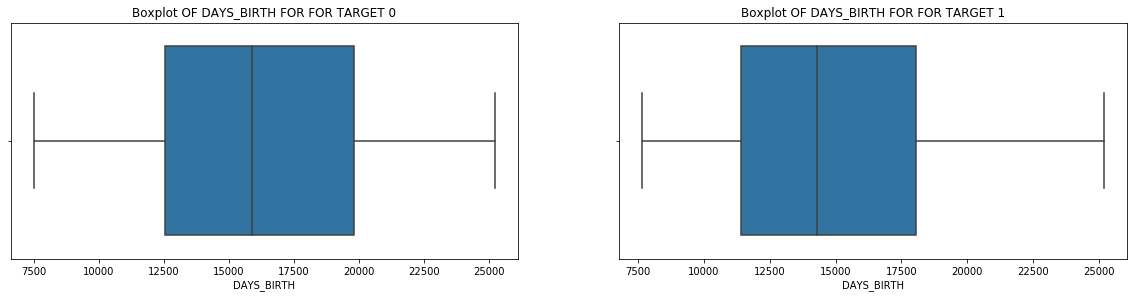

In [12]:
#Box_plot on target variable 0 and 1 for DAYS_BIRTH column
plt.figure(figsize=(20,20))
subplot(4,2,1)
plt.title("Boxplot OF DAYS_BIRTH FOR FOR TARGET 0")
ax = sns.boxplot(df0["DAYS_BIRTH"].abs())
subplot(4,2,2)
plt.title("Boxplot OF DAYS_BIRTH FOR FOR TARGET 1")
ax = sns.boxplot(df1["DAYS_BIRTH"].abs())
plt.show()

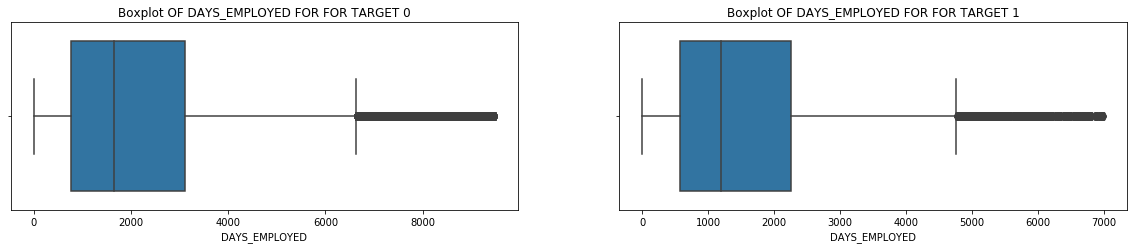

In [13]:
#Box_plot on target variable 0 and 1 for DAYS_EMPLOYED column after removing outliers
q0_1 = df0['DAYS_EMPLOYED'].quantile(0.15)
q0_3 = df0['DAYS_EMPLOYED'].quantile(0.75)
intr_qua_rnge = q0_3-q0_1 
low  = q0_1-1.5*intr_qua_rnge
high = q0_3+1.5*intr_qua_rnge
df0_out_emp = df0.loc[(df0['DAYS_EMPLOYED'] > low) & (df0['DAYS_EMPLOYED'] < high)]

q1_1 = df1['DAYS_EMPLOYED'].quantile(0.15)
q1_3 = df1['DAYS_EMPLOYED'].quantile(0.75)
intr_qua_rnge = q1_3-q1_1 
low  = q1_1-1.5*intr_qua_rnge
high = q1_3+1.5*intr_qua_rnge
df1_out_emp = df1.loc[(df1['DAYS_EMPLOYED'] > low) & (df1['DAYS_EMPLOYED'] < high)]

plt.figure(figsize=(20,20))
subplot(5,2,1)
plt.title("Boxplot OF DAYS_EMPLOYED FOR FOR TARGET 0")
ax = sns.boxplot(df0_out_emp["DAYS_EMPLOYED"].abs())
subplot(5,2,2)
plt.title("Boxplot OF DAYS_EMPLOYED FOR FOR TARGET 1")
ax = sns.boxplot(df1_out_emp["DAYS_EMPLOYED"].abs())
plt.show()

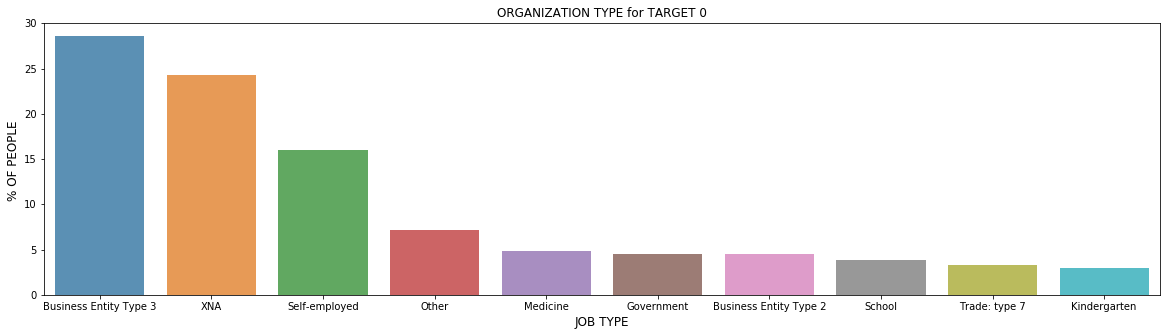

In [14]:
#Bar Graph on Organization type for TARGET variable 0
occ=df0["ORGANIZATION_TYPE"].value_counts().head(10)
plt.figure(figsize=(20,5))
y=(occ/occ.sum())*100
sns.barplot(occ.index,y, alpha=0.8)
plt.title('ORGANIZATION TYPE for TARGET 0')
plt.ylabel('% OF PEOPLE ', fontsize=12)
plt.xlabel('JOB TYPE', fontsize=12)
plt.show()

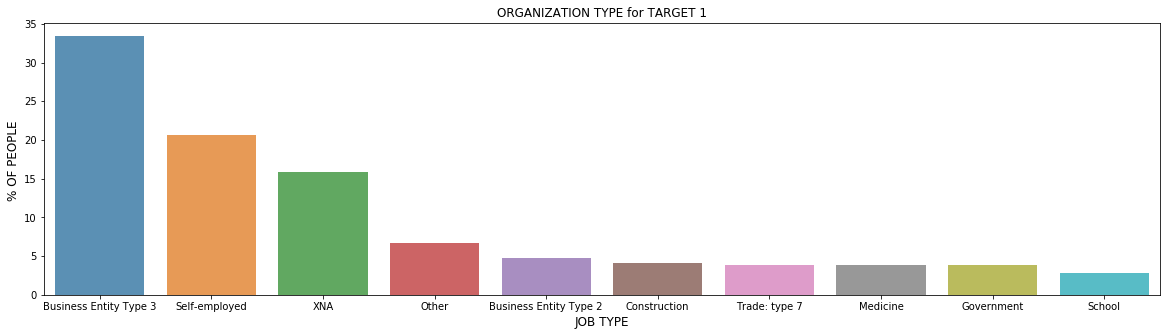

In [15]:
#Bar Graph on Organization type for TARGET variable 1
occ=df1["ORGANIZATION_TYPE"].value_counts().head(10)
plt.figure(figsize=(20,5))
y=(occ/occ.sum())*100
sns.barplot(occ.index,y, alpha=0.8)
plt.title('ORGANIZATION TYPE for TARGET 1')
plt.ylabel('% OF PEOPLE ', fontsize=12)
plt.xlabel('JOB TYPE', fontsize=12)
plt.show()

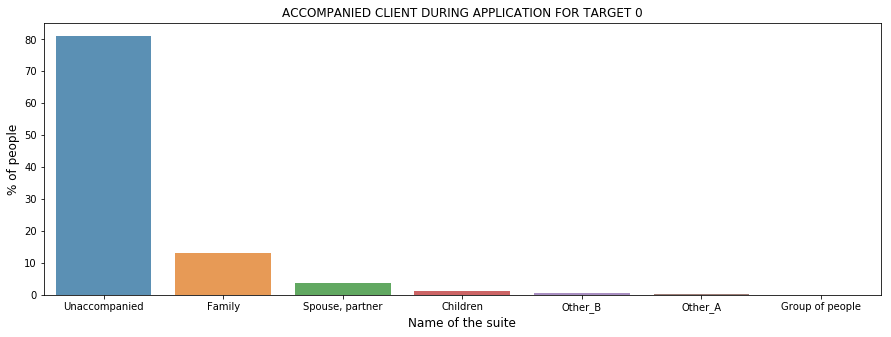

In [16]:
#Bar graph for type of accompanied client during application for target 0
temp = df0["NAME_TYPE_SUITE"].value_counts().head(10)
y=(temp/temp.sum())*100
plt.figure(figsize=(15,5))
sns.barplot(temp.index, y, alpha=0.8)
plt.title('ACCOMPANIED CLIENT DURING APPLICATION FOR TARGET 0')
plt.ylabel('% of people', fontsize=12)
plt.xlabel('Name of the suite', fontsize=12)
plt.show()

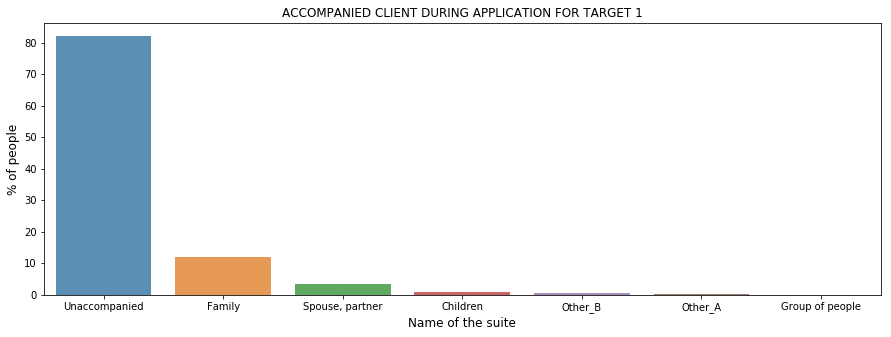

In [17]:
#Bar graph for type of accompanied client during application for target 1
temp = df1["NAME_TYPE_SUITE"].value_counts().head(10)
y=(temp/temp.sum())*100
plt.figure(figsize=(15,5))
sns.barplot(temp.index, y, alpha=0.8)
plt.title('ACCOMPANIED CLIENT DURING APPLICATION FOR TARGET 1')
plt.ylabel('% of people', fontsize=12)
plt.xlabel('Name of the suite', fontsize=12)
plt.show()

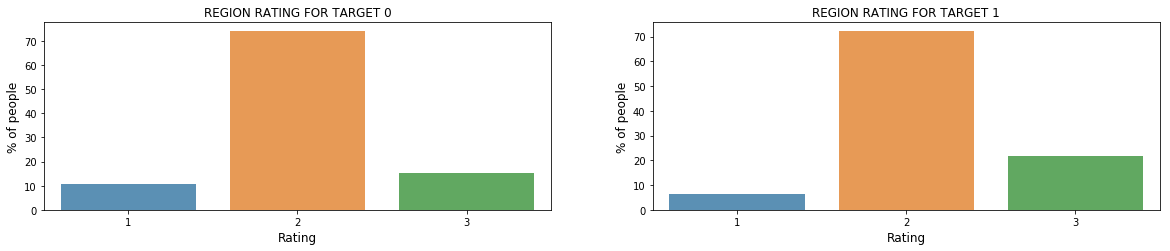

In [18]:
#SubPlot bar graph for REGION_RATING for both target variable
rating = df0["REGION_RATING_CLIENT"].value_counts().head(10)
y=(rating/rating.sum())*100
plt.figure(figsize=(20,20))
subplot(5,2,1)
sns.barplot(rating.index, y, alpha=0.8)
plt.title('REGION RATING FOR TARGET 0')
plt.ylabel('% of people', fontsize=12)
plt.xlabel('Rating', fontsize=12)

rating = df1["REGION_RATING_CLIENT"].value_counts().head(10)
subplot(5,2,2)
y=(rating/rating.sum())*100
sns.barplot(rating.index, y, alpha=0.8)
plt.title('REGION RATING FOR TARGET 1')
plt.ylabel('% of people', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()

In [19]:
#Loading of previous application file and analysing the same
df_prev=pd.read_csv(r'previous_application.csv')

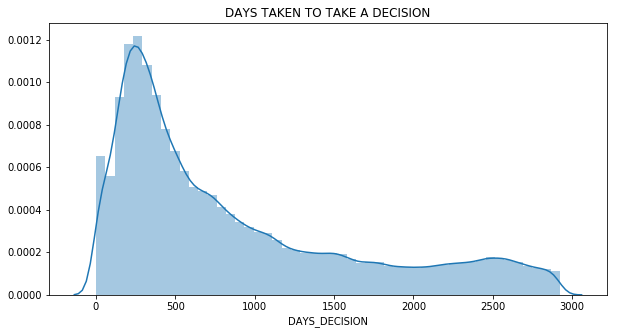

In [20]:
# DAYS TAKEN TO TAKE A DECESION FOR PREVIOUS APPLICATION DATA
plt.figure(figsize=(10,5))
sns.distplot(df_prev["DAYS_DECISION"].abs().dropna())
plt.title('DAYS TAKEN TO TAKE A DECISION')
plt.show()

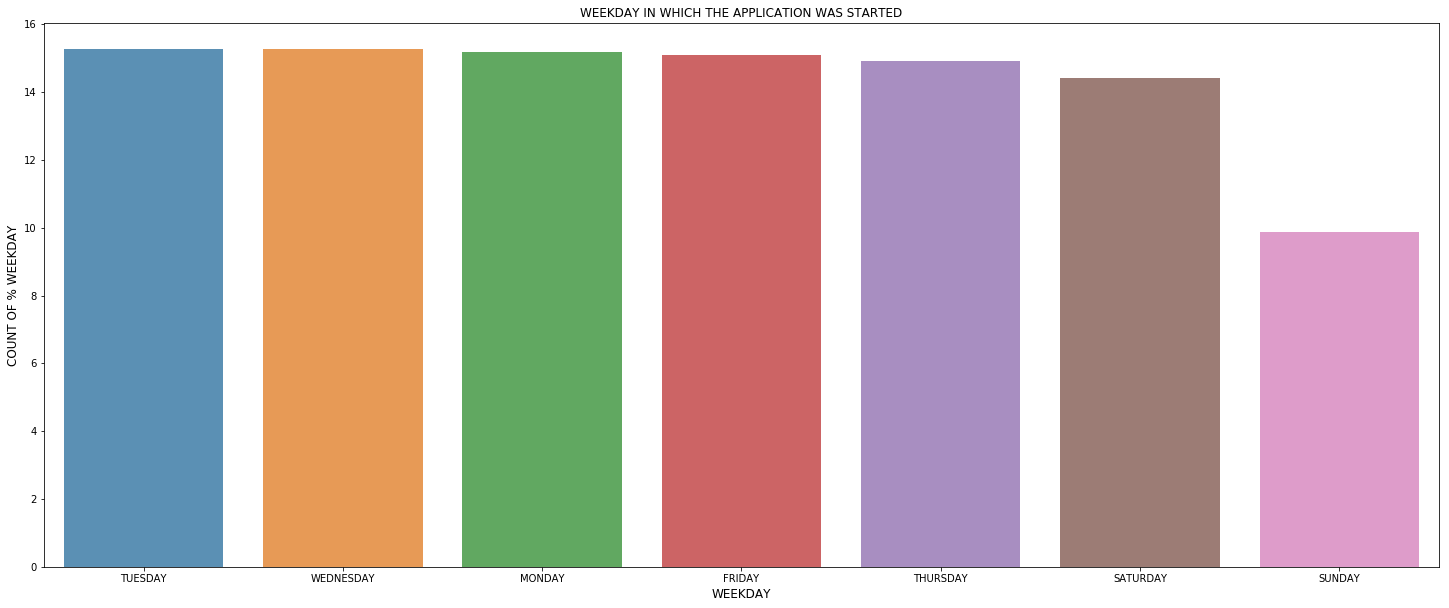

In [21]:
#Bargraph showing busy schedule on each day of the week 
week=df_prev["WEEKDAY_APPR_PROCESS_START"].value_counts()
plt.figure(figsize=(25,10))
y=(week/week.sum())*100
sns.barplot(week.index,y, alpha=0.8)
plt.title('WEEKDAY IN WHICH THE APPLICATION WAS STARTED')
plt.ylabel('COUNT OF % WEEKDAY', fontsize=12)
plt.xlabel('WEEKDAY', fontsize=12)
plt.show()

In [22]:
#Converting previous data set based on whether person loan got approved in past or not, 0- Approved 1- Rejected
df_prev['NAME_CONTRACT_STATUS'] = df_prev['NAME_CONTRACT_STATUS'].replace('Approved', 0)
df_prev['NAME_CONTRACT_STATUS'] = df_prev['NAME_CONTRACT_STATUS'].replace('Refused', 1)
df_prev['NAME_CONTRACT_STATUS'] = df_prev['NAME_CONTRACT_STATUS'].replace('Canceled' , 1)
df_prev['NAME_CONTRACT_STATUS'] = df_prev['NAME_CONTRACT_STATUS'].replace('Unused offer' , 1)

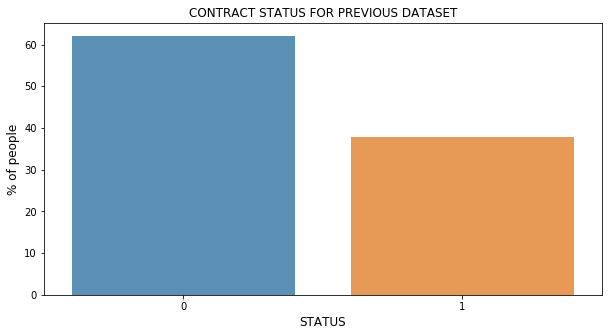

In [24]:
#Bargraph showing comparsion whether loan has been rejected or approved based on previous data
status = df_prev["NAME_CONTRACT_STATUS"].value_counts()
y=(status/status.sum())*100
plt.figure(figsize=(10,5))
sns.barplot(status.index, y, alpha=0.8)
plt.title('CONTRACT STATUS FOR PREVIOUS DATASET')
plt.ylabel('% of people', fontsize=12)
plt.xlabel('STATUS', fontsize=12)
plt.show()

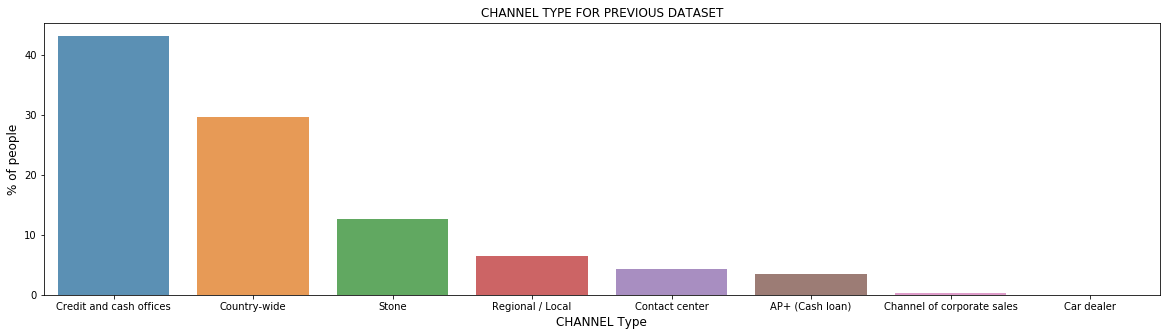

In [25]:
#Bar graph showing channel from where people came for loan based on previous dataset
channel = df_prev["CHANNEL_TYPE"].value_counts()
y=(channel/channel.sum())*100
channel=channel[:10]
plt.figure(figsize=(20,5))
sns.barplot(channel.index, y, alpha=0.8)
plt.title('CHANNEL TYPE FOR PREVIOUS DATASET')
plt.ylabel('% of people', fontsize=12)
plt.xlabel('CHANNEL Type', fontsize=12)
plt.show()

In [26]:
#Again loading application data for bivariate analysis using correlation between columns
df=pd.read_csv(r'application_data.csv')
pd.options.display.float_format = '{:.3f}'.format
#converting YES and NO to 1 and 0 respectively to make it consider in correlation
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})
#since only numerical values is considered during finding correlation between two variables, we will only consider int64 and float64 datatype columns
df=df.select_dtypes(exclude=[object])
#dividing dataset based on target value i.e. df0 will contain data corresponding to Target variable 0 and df1 will contain data corresponding to Target variable 1
df0=df[df['TARGET']==0]
df1=df[df['TARGET']==1]
#Removing column having more than 17% null values
df=df[df.columns[df.isnull().mean() < 0.17]]
df0=df0[df0.columns[df0.isnull().mean() < 0.17]]
df1=df1[df1.columns[df1.isnull().mean() < 0.17]]
print("Main application data shape:",df.shape)
print("df0 shape:",df0.shape)
print("df1 shape:",df1.shape)

Main application data shape: (307511, 62)
df0 shape: (282686, 62)
df1 shape: (24825, 56)


In [27]:
#coverting all negative vaues to positive values as this will help us in better analysis of result
df=df.abs()
df0=df0.abs()
df1=df1.abs()

In [28]:
#Finding rows that impact the most whether person taking the loan will default or not based on application data
correl=df.corr()
k=[]
print(correl.nlargest(11, 'TARGET').loc[:,'TARGET'])
k=correl.nlargest(11, 'TARGET').loc[:,'TARGET'].index
print(correl.nsmallest(11, 'TARGET').loc[:,'TARGET'])
k=k.append(correl.nsmallest(11, 'TARGET').loc[:,'TARGET'].index)

TARGET                        1.000
REGION_RATING_CLIENT_W_CITY   0.061
REGION_RATING_CLIENT          0.059
REG_CITY_NOT_WORK_CITY        0.051
FLAG_EMP_PHONE                0.046
REG_CITY_NOT_LIVE_CITY        0.044
FLAG_DOCUMENT_3               0.044
LIVE_CITY_NOT_WORK_CITY       0.033
DEF_30_CNT_SOCIAL_CIRCLE      0.032
DEF_60_CNT_SOCIAL_CIRCLE      0.031
FLAG_WORK_PHONE               0.029
Name: TARGET, dtype: float64
EXT_SOURCE_2                 -0.160
DAYS_BIRTH                   -0.078
DAYS_LAST_PHONE_CHANGE       -0.055
DAYS_ID_PUBLISH              -0.051
DAYS_EMPLOYED                -0.047
DAYS_REGISTRATION            -0.042
AMT_GOODS_PRICE              -0.040
REGION_POPULATION_RELATIVE   -0.037
AMT_CREDIT                   -0.030
FLAG_DOCUMENT_6              -0.029
HOUR_APPR_PROCESS_START      -0.024
Name: TARGET, dtype: float64


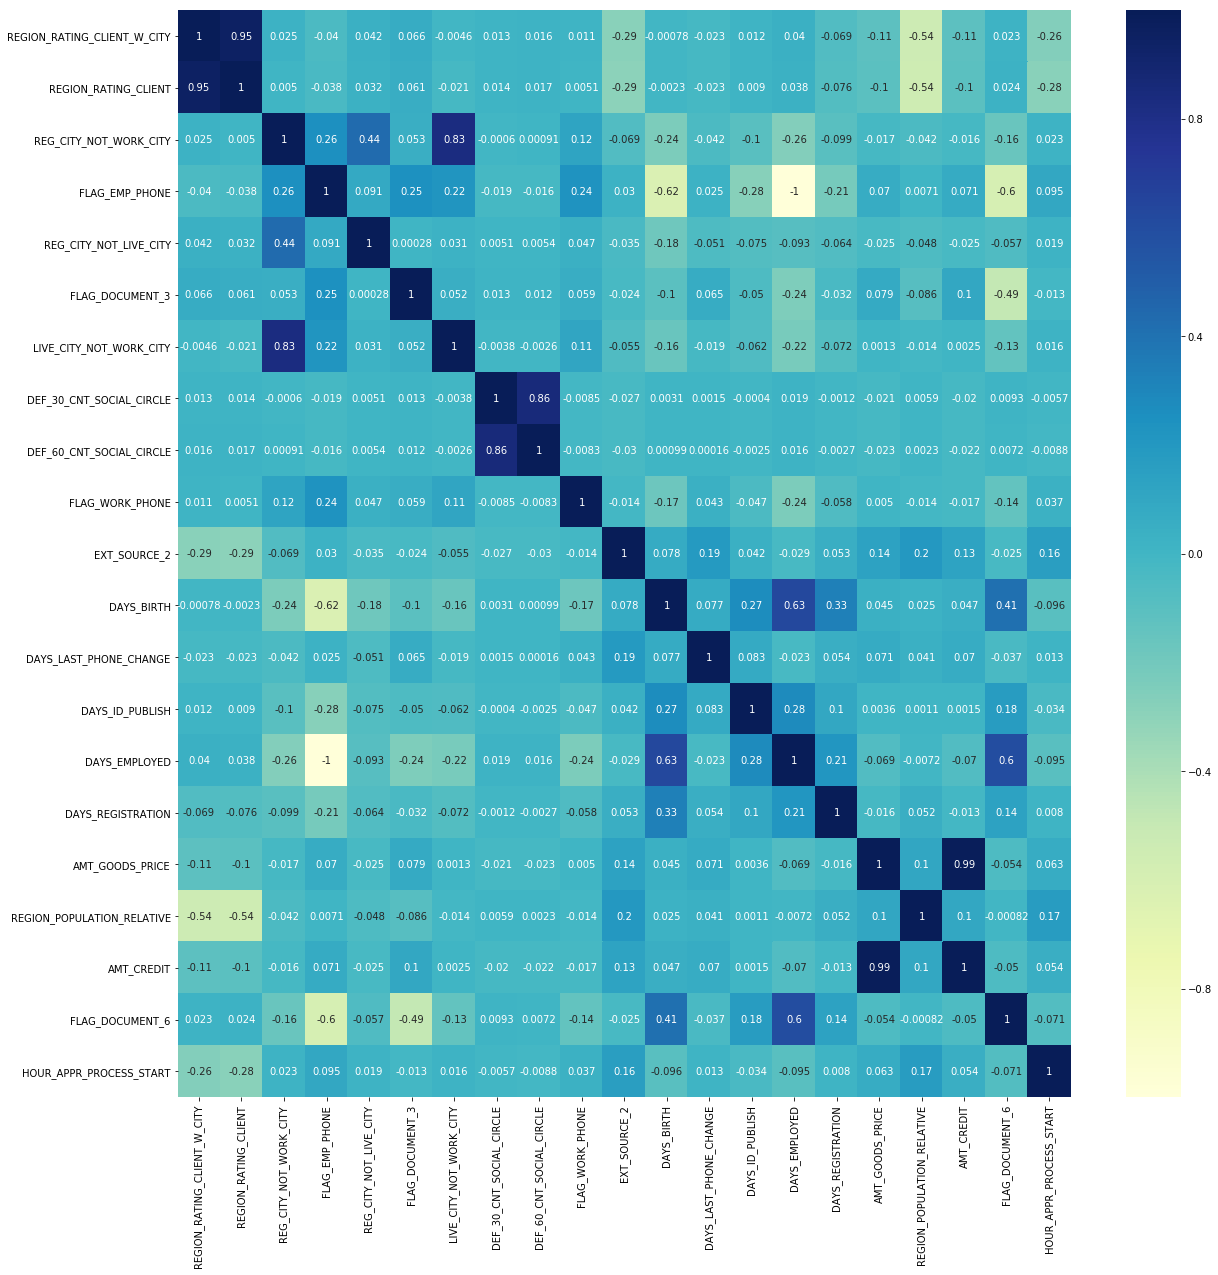

In [29]:
#Correlation between columns obtained above for Target variable 0
correl0=df0.corr()
correl0=correl0.loc[k[1:]]
correl0=correl0.T
correl0=correl0.loc[k[1:]]
plt.figure(figsize=(20,20))
sns.heatmap(correl0, cmap="YlGnBu", annot=True)
plt.show()

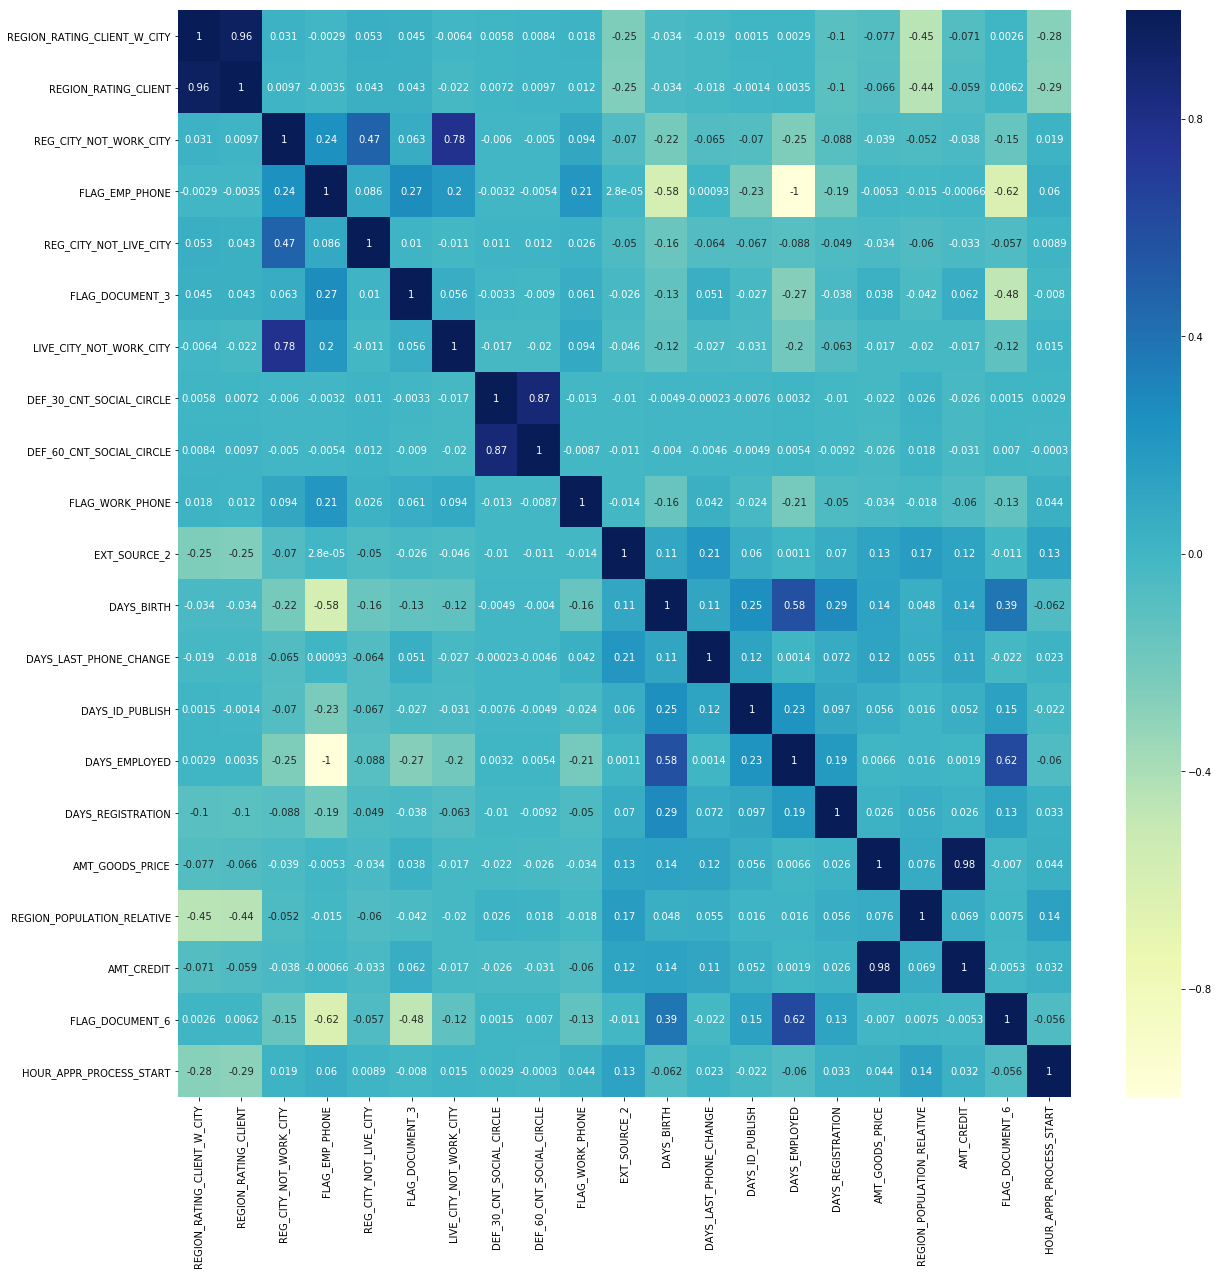

In [30]:
#Correlation between columns obtained above for Target variable 1
correl1=df1.corr()
correl1=correl1.loc[k[1:]]
correl1=correl1.T
correl1=correl1.loc[k[1:]]
plt.figure(figsize=(20,20))
sns.heatmap(correl1, cmap="YlGnBu", annot=True)
plt.show()

In [31]:
#Finding rows that impact the most whether person taking the loan will default or not based on previous application data
df_prev=df_prev.select_dtypes(exclude=[object])
df_prev=df_prev.abs()
correl_prev=df_prev.corr()
k=[]
print(correl_prev.nlargest(4, 'NAME_CONTRACT_STATUS').loc[:,'NAME_CONTRACT_STATUS'])
k=correl_prev.nlargest(4, 'NAME_CONTRACT_STATUS').loc[:,'NAME_CONTRACT_STATUS'].index
print(correl_prev.nsmallest(3, 'NAME_CONTRACT_STATUS').loc[:,'NAME_CONTRACT_STATUS'])
k=k.append(correl_prev.nsmallest(3, 'NAME_CONTRACT_STATUS').loc[:,'NAME_CONTRACT_STATUS'].index)

NAME_CONTRACT_STATUS   1.000
CNT_PAYMENT            0.264
AMT_GOODS_PRICE        0.232
AMT_ANNUITY            0.166
Name: NAME_CONTRACT_STATUS, dtype: float64
DAYS_DECISION            -0.361
RATE_DOWN_PAYMENT        -0.122
NFLAG_LAST_APPL_IN_DAY   -0.061
Name: NAME_CONTRACT_STATUS, dtype: float64


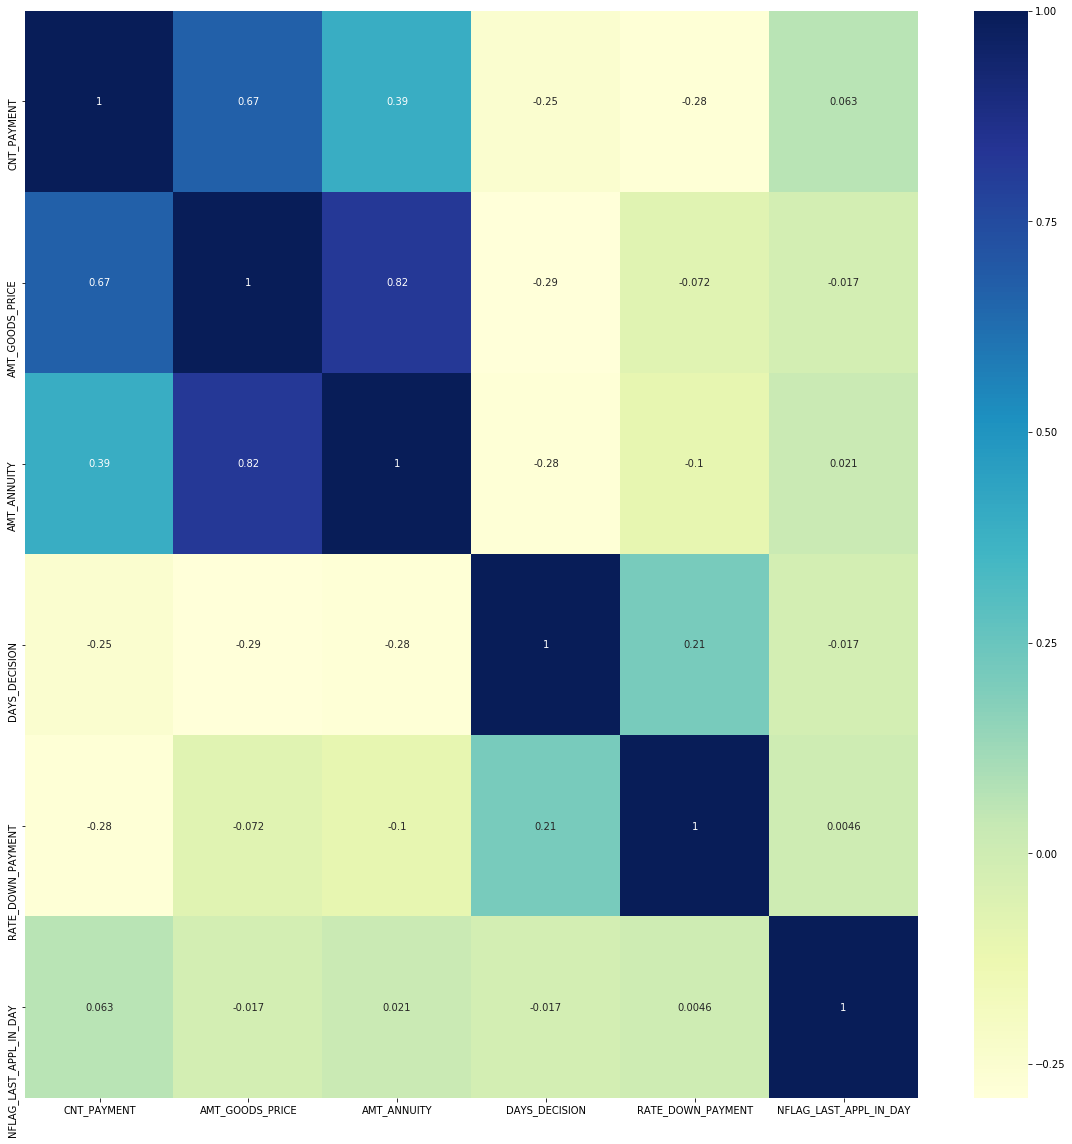

In [34]:
#Correlation of variables obtained above. CNT_PAYMENT, AMT_GOODS_PRICE and AMT_ANNUITY will directly proportional to the person
#who will default. DAYS_DECISION, RATE_DOWN_PAYMENT and NFLAG_LAST_APPL_IN_DAY is inversely proportional to the defaulter.
correl_prev=correl_prev.loc[k[1:]]
correl_prev=correl_prev.T
correl_prev=correl_prev.loc[k[1:]]
plt.figure(figsize=(20,20))
sns.heatmap(correl_prev, cmap="YlGnBu", annot=True)
plt.show()